In [1]:
!scp -r whittle@192.168.0.14:~/data/ .

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

plt.style.use('seaborn-v0_8')

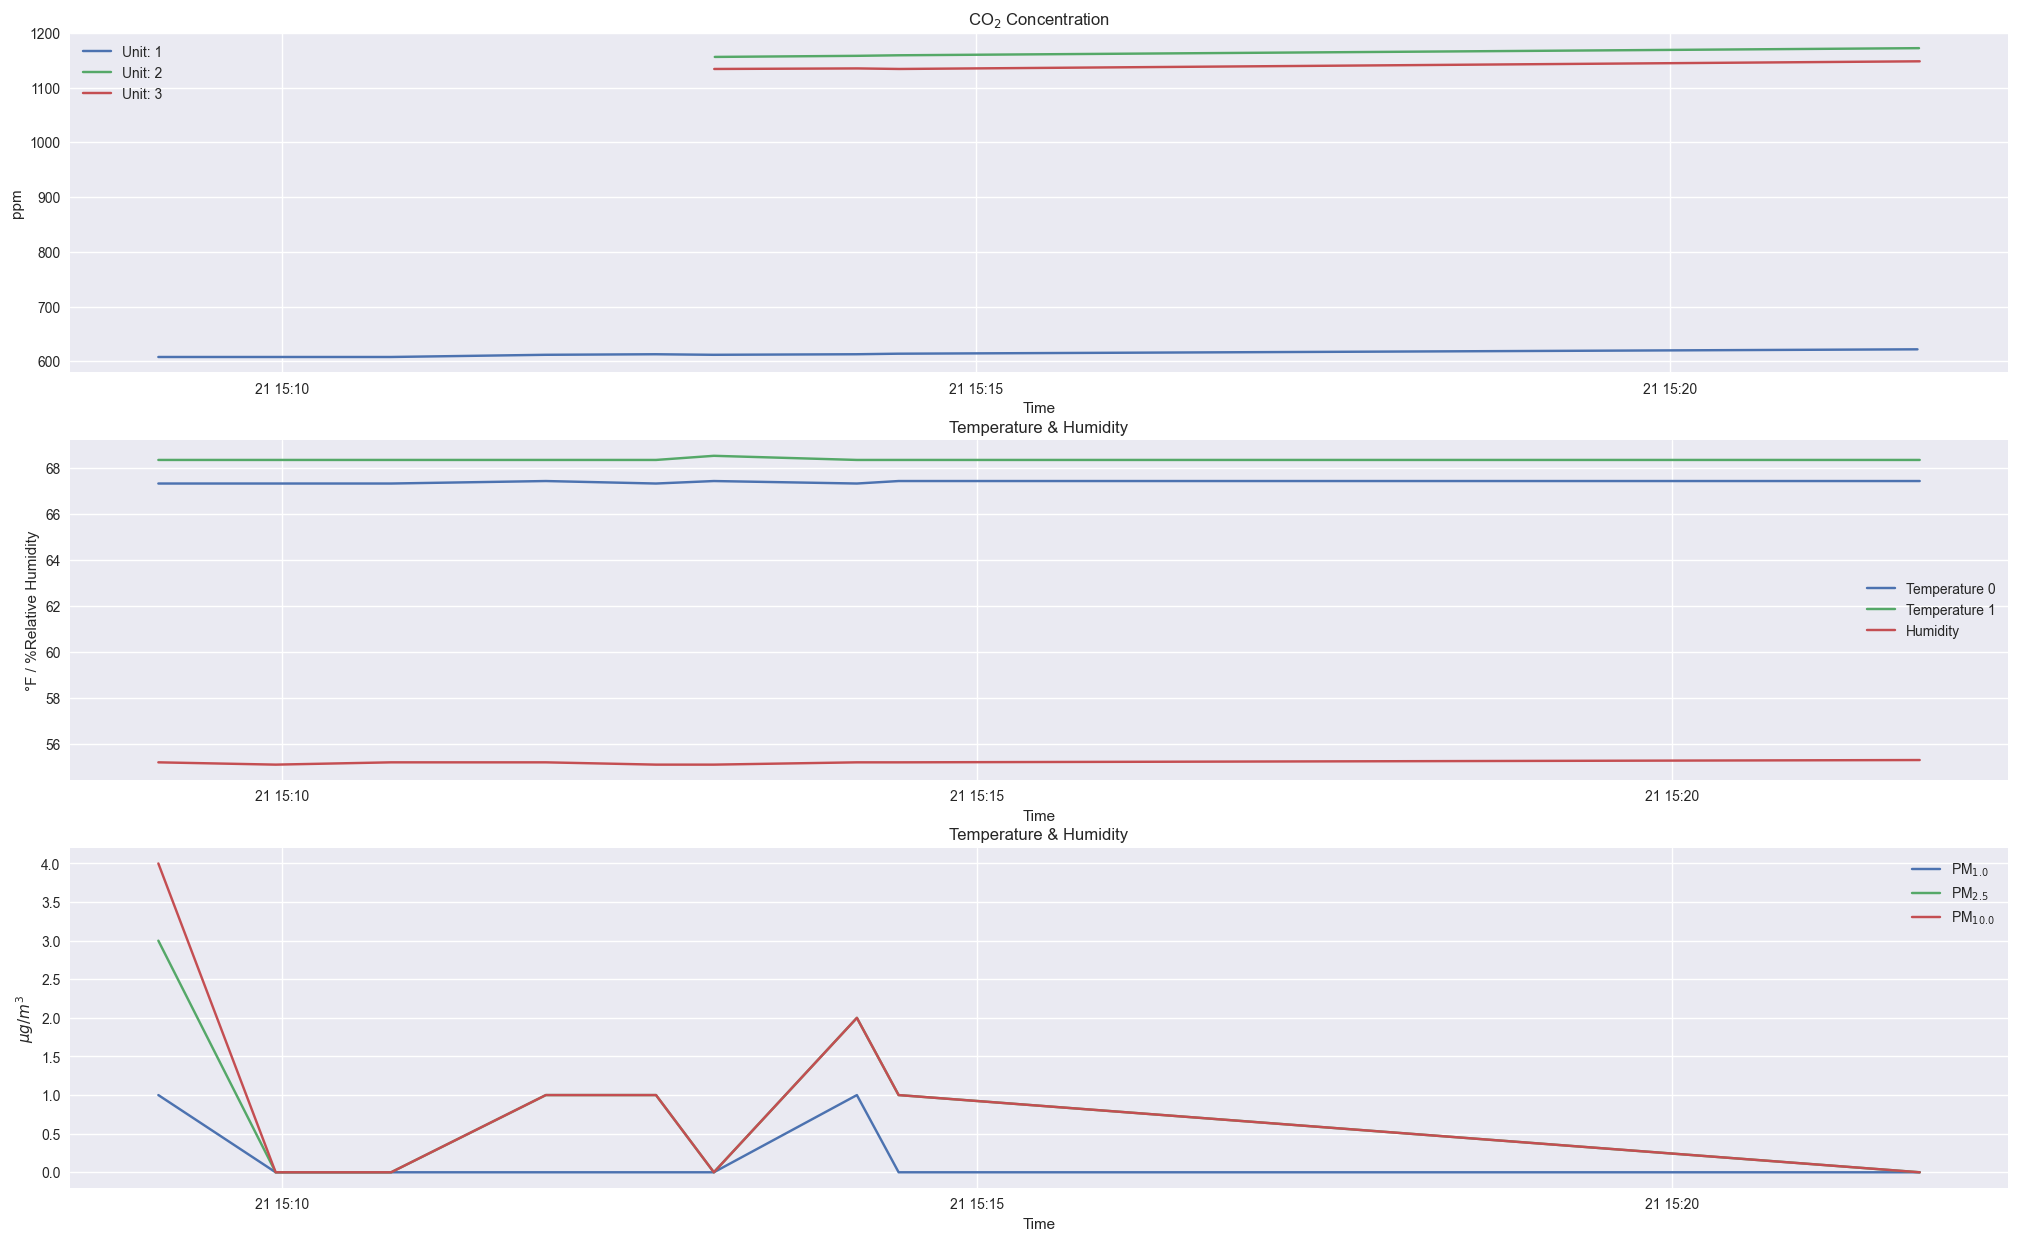

In [4]:
DATA_DIR = './data/'

files = [f'{DATA_DIR}{i}' for i in os.listdir(DATA_DIR) if i.endswith('.h5')]
dfs = [pd.read_hdf(i) for i in sorted(files)]
df = pd.concat(dfs).reset_index()

fig, ax = plt.subplots(3, 1, figsize=(25, 15))
groups = df.groupby('id')
for i, _ in groups:
    ax[0].plot(groups.get_group(i)['timestamp'], groups.get_group(i)['co2'], label=f'Unit: {i}')
    ax[0].set(title='CO$_2$ Concentration', xlabel='Time', ylabel='ppm')
    
ax[1].plot(groups.get_group(1)['timestamp'], groups.get_group(1)['temp_0']*1.8+32, label=f'Temperature 0')
ax[1].plot(groups.get_group(1)['timestamp'], groups.get_group(1)['temp_1']*1.8+32, label=f'Temperature 1')
ax[1].plot(groups.get_group(1)['timestamp'], groups.get_group(1)['humidity'], label=f'Humidity')
ax[1].set(title='Temperature & Humidity', xlabel='Time', ylabel='°F / %Relative Humidity')

ax[2].plot(groups.get_group(1)['timestamp'], groups.get_group(1)['pm1_0'], label=f'PM$_{{1.0}}$')
ax[2].plot(groups.get_group(1)['timestamp'], groups.get_group(1)['pm2_5'], label=f'PM$_{{2.5}}$')
ax[2].plot(groups.get_group(1)['timestamp'], groups.get_group(1)['pm10_0'], label=f'PM$_{{10.0}}$')
ax[2].set(title='Temperature & Humidity', xlabel='Time', ylabel='$\mu g/m^3$')

for ax in ax:
    ax.legend()

plt.show()